## Imports

In [1]:
from SCTransform import SCTransform
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [2]:
#adata = sc.datasets.pbmc3k()
adata = sc.read_h5ad('../data/pbmc_33k.h5ad')

## Run SCTransform

In [3]:
%%time
adata_sct = SCTransform(adata,
                        min_cells=5,
                        gmean_eps=1,
                        n_genes=2000,
                        n_cells=None, #use all cells
                        bin_size=500,
                        bw_adjust=3,
                        inplace=False)

CPU times: user 8.6 s, sys: 1.19 s, total: 9.79 s
Wall time: 3min 11s


## Plot the fit parameters

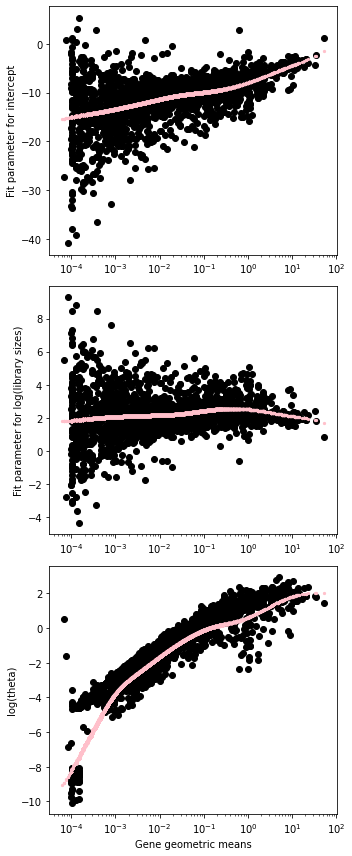

In [4]:
# Pull out the fit parameters (both step1 and extrapolated)
intercept1 = adata_sct.var['Intercept_step1_sct'].values
filt = np.invert(np.isnan(intercept1))

gmean = 10**adata_sct.var['log10_gmean_sct'].values
gmean1 = gmean[filt]
intercept1 = intercept1[filt]

intercept = adata_sct.var['Intercept_sct'].values
logumi = adata_sct.var['log_umi_sct'].values
logumi1 = adata_sct.var['log_umi_step1_sct'].values[filt]
theta = adata_sct.var['theta_sct'].values
theta1 = adata_sct.var['dispersion_step1_sct'].values[filt]
theta1 = gmean1 / (10**theta1 - 1)

# Do the plotting
fig,axs = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches((5,12))
ax=axs[0]
ax.scatter(gmean1,intercept1,color='k'); 
ax.scatter(gmean,intercept,color='pink',s=5);
ax.set_ylabel('Fit parameter for intercept')
ax.set_xscale('log')

ax=axs[1]
ax.scatter(gmean1,logumi1,color='k'); 
ax.scatter(gmean,logumi,color='pink',s=5);
ax.set_ylabel('Fit parameter for log(library sizes)')
ax.set_xscale('log')

ax=axs[2]
ax.scatter(gmean1,np.log(theta1),color='k'); 
ax.scatter(gmean,np.log(theta),color='pink',s=5);
ax.set_xlabel('Gene geometric means')
ax.set_ylabel('log(theta)')
ax.set_xscale('log')
fig.tight_layout()